In [ ]:
#TEAM MEMBERS : THARUN REDDY DESIREDDY & LAVANYA GUNTAKALA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/1000, Training Loss: 0.1252, Testing Loss: 0.1254
Epoch 2/1000, Training Loss: 0.1230, Testing Loss: 0.1234
Epoch 3/1000, Training Loss: 0.1213, Testing Loss: 0.1220
Epoch 4/1000, Training Loss: 0.1204, Testing Loss: 0.1211
Epoch 5/1000, Training Loss: 0.1195, Testing Loss: 0.1207
Epoch 6/1000, Training Loss: 0.1189, Testing Loss: 0.1198
Epoch 7/1000, Training Loss: 0.1184, Testing Loss: 0.1193
Epoch 8/1000, Training Loss: 0.1177, Testing Loss: 0.1189
Epoch 9/1000, Training Loss: 0.1173, Testing Loss: 0.1185
Epoch 10/1000, Training Loss: 0.1168, Testing Loss: 0.1178
Epoch 11/1000, Training Loss: 0.1164, Testing Loss: 0.1171
Epoch 12/1000, Training Loss: 0.1159, Testing Loss: 0.1169
Epoch 13/1000, Training Loss: 0.1155, Testing Loss: 0.1167
Epoch 14/1000, Training Loss: 0.1153, Testing Loss: 0.1162
Epoch 15/1000, Training Loss: 0.1149, Testing Loss: 0.

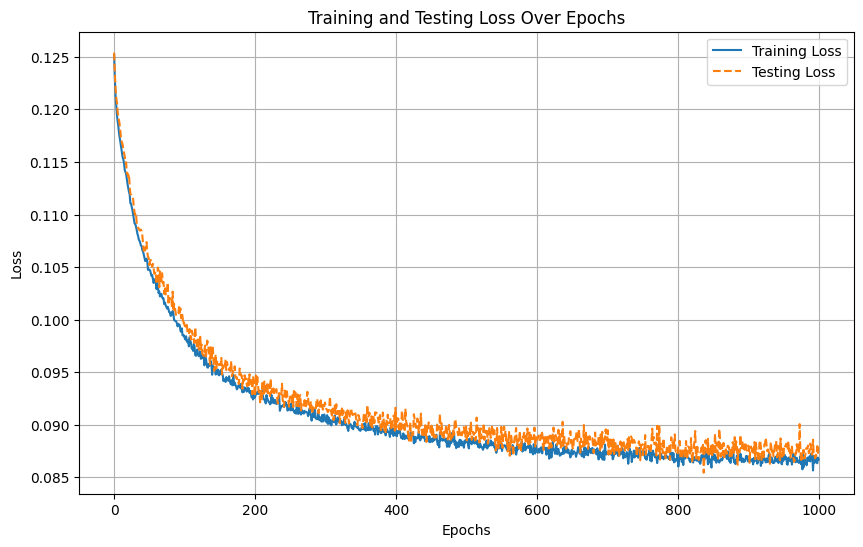

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from random import choice

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset and output directories
data_dir = '/content/drive/MyDrive/DeepLearning/Dataset'  # Dataset with `oriental`, `indian`, `european`
output_dir = '/content/drive/MyDrive/DeepLearning/Generated_Images3'  # Output directory for mixed faces
os.makedirs(output_dir, exist_ok=True)

# Hyperparameters
img_size = 128
batch_size = 8
num_timesteps = 100
beta_start = 0.0001
beta_end = 0.02
num_epochs = 1000

# Custom Dataset Loader
class CustomDataset(tf.keras.utils.Sequence):
    def __init__(self, directory, img_size):
        self.images = []
        self.labels = []
        self.label_map = {"indian": 0, "european": 1, "oriental": 2}
        self.img_size = img_size

        for label_name, label_idx in self.label_map.items():
            folder = os.path.join(directory, label_name)
            if os.path.exists(folder):
                for filename in os.listdir(folder):
                    if filename.endswith(('.jpg', '.png', '.jpeg')):
                        self.images.append(os.path.join(folder, filename))
                        self.labels.append(label_idx)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.open(self.images[idx]).convert('RGB')
        img = img.resize((self.img_size, self.img_size))
        img = np.array(img) / 127.5 - 1  # Normalize to [-1, 1]
        label = self.labels[idx]
        return img, label

# Load dataset
dataset = CustomDataset(data_dir, img_size)
images = np.array([dataset[i][0] for i in range(len(dataset))])
labels = np.array([dataset[i][1] for i in range(len(dataset))])

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Organize images by group for generation
group_images = {label: images[labels == idx] for label, idx in dataset.label_map.items()}

# Custom Diffusion Schedule
def diffusion_schedule(num_timesteps, beta_start, beta_end):
    betas = np.linspace(beta_start, beta_end, num_timesteps)
    alphas = 1 - betas
    alpha_bars = np.cumprod(alphas)
    return betas, alpha_bars

betas, alpha_bars = diffusion_schedule(num_timesteps, beta_start, beta_end)

# Add noise to images
def add_noise(images, timesteps):
    """
    Add noise to the images based on the given timesteps.
    Ensures timesteps are within the valid range.
    """
    noise = np.random.normal(size=images.shape)
    alpha_bar_t = alpha_bars[timesteps][:, None, None, None]
    noisy_images = np.sqrt(alpha_bar_t) * images + np.sqrt(1 - alpha_bar_t) * noise
    return noisy_images, noise

# Define U-Net Model
def create_unet():
    inputs = layers.Input(shape=(img_size, img_size, 3))
    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.UpSampling2D(size=2)(x)
    x = layers.Conv2DTranspose(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.UpSampling2D(size=2)(x)
    outputs = layers.Conv2D(3, kernel_size=3, padding='same')(x)
    return Model(inputs, outputs)

model = create_unet()
optimizer = Adam(learning_rate=1e-4)

# Loss function
def compute_loss(noise_pred, noise):
    return tf.reduce_mean(tf.square(noise_pred - noise))

# Train-Test Tracking
training_losses = []
testing_losses = []

# Training Loop with Metrics
for epoch in range(num_epochs):
    # Training
    epoch_loss = 0.0
    for i in range(0, len(train_images), batch_size):
        batch_images = train_images[i:i + batch_size]
        timesteps = np.random.randint(0, num_timesteps, size=batch_images.shape[0])
        noisy_images, noise = add_noise(batch_images, timesteps)

        with tf.GradientTape() as tape:
            noise_pred = model(noisy_images, training=True)
            loss = compute_loss(noise_pred, noise)

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss += loss.numpy()

    avg_train_loss = epoch_loss / len(train_images)
    training_losses.append(avg_train_loss)

    # Testing
    test_loss = 0.0
    for i in range(0, len(test_images), batch_size):
        batch_images = test_images[i:i + batch_size]
        timesteps = np.random.randint(0, num_timesteps, size=batch_images.shape[0])
        noisy_images, noise = add_noise(batch_images, timesteps)

        noise_pred = model(noisy_images, training=False)
        loss = compute_loss(noise_pred, noise)
        test_loss += loss.numpy()

    avg_test_loss = test_loss / len(test_images)
    testing_losses.append(avg_test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Testing Loss: {avg_test_loss:.4f}")

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label="Training Loss")
plt.plot(testing_losses, label="Testing Loss", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Image Mixing and Generation
def mix_and_generate_images(model, images, steps, alpha_list=None):
    """
    Mix and generate new images from multiple sources.
    """
    if alpha_list is None:
        alpha_list = [1 / len(images)] * len(images)

    mixed_noise = None
    for i, image in enumerate(images):
        noise, _ = add_noise(image[None], [steps])
        if mixed_noise is None:
            mixed_noise = alpha_list[i] * noise
        else:
            mixed_noise += alpha_list[i] * noise

    for t in reversed(range(steps)):
        predicted_noise = model.predict(mixed_noise)
        mixed_noise = (mixed_noise - betas[t] * predicted_noise) / np.sqrt(1 - betas[t])

    return np.clip((mixed_noise.squeeze() + 1) * 127.5, 0, 255).astype(np.uint8)

# Generate and Save Mixed Faces
combinations = [
    ("oriental", "indian"),
    ("oriental", "european"),
    ("indian", "european"),
    ("oriental", "indian", "european")
]

mixed_images_dir = os.path.join(output_dir, "Mixed_Faces")
os.makedirs(mixed_images_dir, exist_ok=True)

for combination in combinations:
    combination_images = [group_images[label] for label in combination if label in group_images]
    for i in range(10):  # Generate 10 images for each combination
        selected_images = [choice(images) for images in combination_images]
        mixed_image = mix_and_generate_images(model, selected_images, steps=num_timesteps // 2)
        output_path = os.path.join(mixed_images_dir, f"mixed_{'_'.join(combination)}_{i+1}.png")
        Image.fromarray(mixed_image).save(output_path)
        print(f"Generated Mixed Image: {output_path}")

print("All mixed images generated and saved!")
